# 01 什么是逻辑回归

### 逻辑回归：解决分类问题

将样本的特征和样呢发生的概率联系起来，概率是一个数

- 线性回归
    - $\hat{y}=f(x)$
- 逻辑回归
    - $\hat{p}=f(x)$
- $\hat{y}=\left\{\begin{array}{ll}
1, & \hat{p} \geq 0.5 \\
0, & \hat{p} \leq 0.5
\end{array}\right.$

逻辑回归既可以看作是回归算法，也可以看作是分类算法

通常作为分类算法用，只可解决二分类问题

### 逻辑回归
$$\hat{y}=f(x) \longrightarrow \hat{y}=\theta^{T} \cdot x_{b} $$

$$值域：(-\infty, +\infty)，概率的值域为[0, 1]$$

$$\downarrow $$

#### Sigmoid函数
$$\hat{p}=\sigma\left(\theta^{T} \cdot x_{b}\right)$$

$$\sigma(t)=\frac{1}{1+e^{-t}}$$

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def sigmoid(t):
    return 1 / (1 + np.exp(-t))

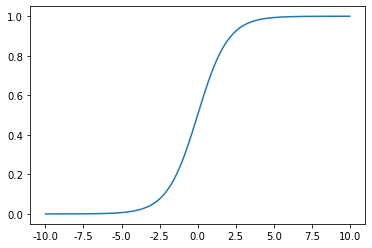

In [8]:
x = np.linspace(-10, 10, 500)
y = sigmoid(x)
plt.plot(x, y)
plt.show()

值域(0, 1)

t>0时，p>0.5

t<0时，p<0.5

$$\hat{p}_{.}=\sigma\left(\theta^{T} \cdot x_{b}\right)=\frac{1}{1+e^{-\theta^{T} \cdot x_{b}}}$$

$$\hat{y}=\left\{\begin{array}{ll}
1, & \hat{p} \geq 0.5 \\
0, & \hat{p} \leq 0.5
\end{array}\right.$$

问题：

对于给定的样本数据集X,y

我们如何找到参数$\theta$,

使得用这样的方式，可以最大程度获得样本数据集X

对应的分类输出y?

# 02 逻辑回归的损失函数
$$\operatorname{cost}=\left\{\begin{array}{ccc}
-\log (\hat{p}) & \text { if } & y=1 \\
-\log (1-\hat{p}) & \text { if } & y=0
\end{array}\right.$$

$$\downarrow$$

$$
\operatorname{cost}=-y \log (\hat{p})-(\mathrm{1}-y) \log (1-\hat{p})
$$

$$\downarrow  m个样本的损失$$

$$
J(\theta)=-\frac{1}{m} \sum_{i=1}^{m} y^{(i)}\log (\hat{p}^{(i)})+(\mathrm{1}-y^{(i)}) \log (1-\hat{p}^{(i)})
$$

$$
\rightarrow \hat{p}_{.}^{(i)}=\sigma\left(X_{b}^{(i)} \cdot \theta \right)=\frac{1}{1+e^{-X_{b}^{(i)} \cdot \theta}}\\
$$

$$
\downarrow\\
$$$$
J(\theta)=-\frac{1}{m} \sum_{i=1}^{m} y^{(i)}\log(\sigma(X_{b}^{(i)} \cdot \theta )) + (\mathrm{1}-\sigma(X_{b}^{(i)} \cdot \theta))
$$
<center>没有公式解，只能使用梯度下降法求解</center>


# 03 逻辑回归的损失函数的梯度



之前求得的式子对单独的$\theta$求导
$$
J(\theta)=-\frac{1}{m} \sum_{i=1}^{m} y^{(i)}\log(\sigma(X_{b}^{(i)} \cdot \theta )) + (\mathrm{1}-\sigma(X_{b}^{(i)} \cdot \theta))
$$

$$\begin{aligned} \frac{J(\theta)}{\theta_{j}} &=\frac{1}{m} \sum_{i=1}^{m}\left(\sigma\left(X_{b}^{(i)} \theta\right)-y^{(i)}\right) X_{j}^{(i)} \\ &=\frac{1}{m} \sum_{i=1}^{m}\left(\hat{y}^{(i)}-y^{(i)}\right) X_{j}^{(i)} \end{aligned}$$

向量化之后：

$$\nabla J(\theta)=\frac{1}{m} \cdot\left(\begin{array}{l}\sum_{i=1}^{m}\left(\hat{y}^{(i)}-y^{(i)}\right) \\ \sum_{i=1}^{m}\left(\hat{y}^{(i)}-y^{(i)}\right) \cdot X_{1}^{(i)} \\ \sum_{i=1}^{m}\left(\hat{y}^{(i)}-y^{(i)}\right) \cdot X_{2}^{(i)} \\ \cdots \\ \sum_{i=1}^{m}\left(\hat{y}^{(i)}-y^{(i)}\right) \cdot X_{n}^{(i)}\end{array}\right)=\frac{1}{m} \cdot X_{b}^{T} \cdot\left(\sigma\left(X_{b} \theta\right)-y\right)$$


# 04 实现逻辑回归算法

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

iris = datasets.load_iris()

In [2]:
X = iris.data
y = iris.target

In [3]:
X = X[y<2, :2]
y = y[y<2]

In [4]:
X.shape

(100, 2)

In [5]:
y.shape

(100,)

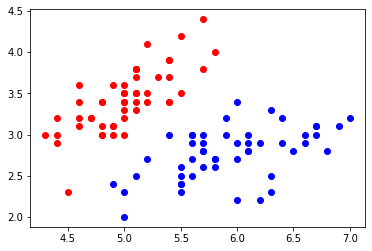

In [6]:
plt.scatter(X[y==0,0], X[y==0,1], color='red')
plt.scatter(X[y==1,0], X[y==1,1], color='blue')
plt.show()

## 使用逻辑回归

In [7]:
from playML.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, seed=666)

In [8]:
from playML.LogisticRegression import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

LogisticRegression()

In [9]:
log_reg.score(X_test,y_test)

1.0

In [10]:
log_reg.predict_proba(X_test)

array([9.62653135e-01, 9.95349838e-01, 1.00815537e-01, 6.17458447e-03,
       1.67444075e-02, 6.92924924e-03, 2.42996729e-02, 9.99216287e-01,
       9.92622490e-01, 7.93947006e-01, 2.16945231e-02, 8.39555098e-04,
       2.12168768e-01, 1.67444075e-02, 8.93315073e-01, 8.47230650e-01,
       8.78370222e-01, 2.82561766e-01, 3.56870279e-02, 1.55511159e-01])

In [11]:
y_test

array([1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0])

In [12]:
log_reg.predict(X_test)

array([1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0])

In [13]:
log_reg.coef_

array([ 3.8011217 , -6.28203018])

In [14]:
log_reg.interception_

-1.0913076412962524

# 05 决策边界

$\theta^{T}\dot x_b = 0 $

$\hat{p}=0.5的地方$

如果X有两个特征:$$\theta_0 + \theta_{1} x_{1} + \theta_{2} x_{2} = 0$$

$$\rightarrow x_{2} = \frac{-\theta_{0} - \theta_{1} x_{1}}{\theta_{2}}$$

In [15]:
# 接上节
def x2(x1):
    return (- log_reg.coef_[0] *x1 - log_reg.interception_) / log_reg.coef_[1]

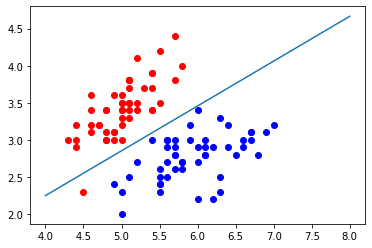

In [18]:
x1_plot = np.linspace(4,8,1000)
x2_plot = x2(x1_plot)

plt.scatter(X[y==0,0], X[y==0,1], color='red')
plt.scatter(X[y==1,0], X[y==1,1], color='blue')
plt.plot(x1_plot, x2_plot)

plt.show()

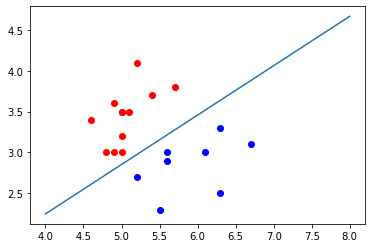

In [19]:
plt.scatter(X_test[y_test==0,0], X_test[y_test==0,1], color='red')
plt.scatter(X_test[y_test==1,0], X_test[y_test==1,1], color='blue')
plt.plot(x1_plot, x2_plot)

plt.show()

### 不规则的边界

In [21]:
def plot_decision_boundary(model, axis):
    x0, x1 = np.meshgrid(
        np.linspace(axis[0], axis[1], int((axis[1]-axis[0])*100)).reshape(-1,1),
        np.linspace(axis[2], axis[3], int((axis[3]-axis[2])*100)).reshape(-1,1),
    )
    
    X_new = np.c_[x0.ravel(), x1.ravel()]

    y_predict = model.predict(X_new)
    zz = y_predict.reshape(x0.shape)

    from matplotlib.colors import ListedColormap
    custom_cmap = ListedColormap(['#EF9A9A','#FFF59D','#90CAF9'])
    
    plt.contourf(x0, x1, zz, linewidth=5, cmap=custom_cmap)

/Users/doublc.qluv/opt/anaconda3/envs/torch/lib/python3.7/site-packages/ipykernel_launcher.py:15: UserWarning: The following kwargs were not used by contour: 'linewidth'
  from ipykernel import kernelapp as app


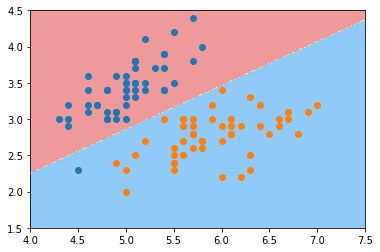

In [25]:
plot_decision_boundary(log_reg,axis=[4.,7.5,1.5,4.5])
plt.scatter(X[y==0,0], X[y==0,1])
plt.scatter(X[y==1,0], X[y==1,1])
plt.show()

## kNN的决策边界

In [26]:
from sklearn.neighbors import KNeighborsClassifier

knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [27]:
knn_clf.score(X_test,y_test)

1.0

/Users/doublc.qluv/opt/anaconda3/envs/torch/lib/python3.7/site-packages/ipykernel_launcher.py:15: UserWarning: The following kwargs were not used by contour: 'linewidth'
  from ipykernel import kernelapp as app


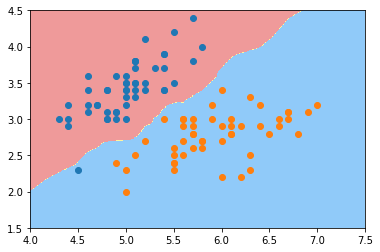

In [28]:
plot_decision_boundary(knn_clf,axis=[4.,7.5,1.5,4.5])
plt.scatter(X[y==0,0], X[y==0,1])
plt.scatter(X[y==1,0], X[y==1,1])
plt.show()

In [29]:
knn_clf_all = KNeighborsClassifier()
knn_clf_all.fit(iris.data[:,:2],iris.target)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

/Users/doublc.qluv/opt/anaconda3/envs/torch/lib/python3.7/site-packages/ipykernel_launcher.py:15: UserWarning: The following kwargs were not used by contour: 'linewidth'
  from ipykernel import kernelapp as app


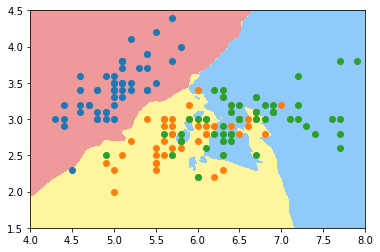

In [30]:
plot_decision_boundary(knn_clf_all,axis=[4.,8,1.5,4.5])
plt.scatter(iris.data[iris.target==0,0], iris.data[iris.target==0,1])
plt.scatter(iris.data[iris.target==1,0], iris.data[iris.target==1,1])
plt.scatter(iris.data[iris.target==2,0], iris.data[iris.target==2,1])
plt.show()

In [31]:
knn_clf_all = KNeighborsClassifier(n_neighbors=50)
knn_clf_all.fit(iris.data[:,:2],iris.target)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=50, p=2,
                     weights='uniform')

/Users/doublc.qluv/opt/anaconda3/envs/torch/lib/python3.7/site-packages/ipykernel_launcher.py:15: UserWarning: The following kwargs were not used by contour: 'linewidth'
  from ipykernel import kernelapp as app


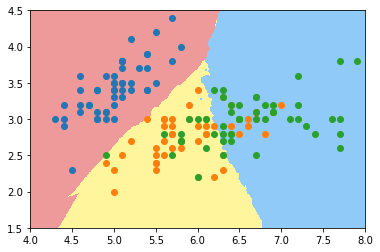

In [32]:
plot_decision_boundary(knn_clf_all,axis=[4.,8,1.5,4.5])
plt.scatter(iris.data[iris.target==0,0], iris.data[iris.target==0,1])
plt.scatter(iris.data[iris.target==1,0], iris.data[iris.target==1,1])
plt.scatter(iris.data[iris.target==2,0], iris.data[iris.target==2,1])
plt.show()

# 06 在逻辑回归中使用多项式特征

In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
np.random.seed(666)
X = np.random.normal(0,1,size=(200,2))
y = np.array(X[:,0]**2 + X[:,1]**2 < 1.5, dtype='int')

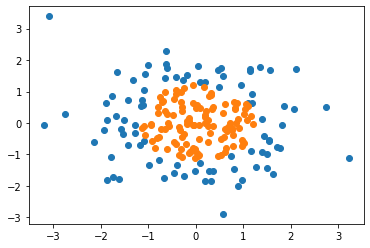

In [6]:
plt.scatter(X[y==0,0], X[y==0,1])
plt.scatter(X[y==1,0], X[y==1,1])
plt.show()

## 使用逻辑回归

In [7]:
from playML.LogisticRegression import LogisticRegression

In [8]:
log_reg = LogisticRegression()
log_reg.fit(X,y)

LogisticRegression()

In [9]:
log_reg.score(X,y)

0.605

In [10]:
def plot_decision_boundary(model, axis):
    x0, x1 = np.meshgrid(
        np.linspace(axis[0], axis[1], int((axis[1]-axis[0])*100)).reshape(-1,1),
        np.linspace(axis[2], axis[3], int((axis[3]-axis[2])*100)).reshape(-1,1),
    )
    
    X_new = np.c_[x0.ravel(), x1.ravel()]

    y_predict = model.predict(X_new)
    zz = y_predict.reshape(x0.shape)

    from matplotlib.colors import ListedColormap
    custom_cmap = ListedColormap(['#EF9A9A','#FFF59D','#90CAF9'])
    
    plt.contourf(x0, x1, zz, linewidth=5, cmap=custom_cmap)

/Users/doublc.qluv/opt/anaconda3/envs/torch/lib/python3.7/site-packages/ipykernel_launcher.py:15: UserWarning: The following kwargs were not used by contour: 'linewidth'
  from ipykernel import kernelapp as app


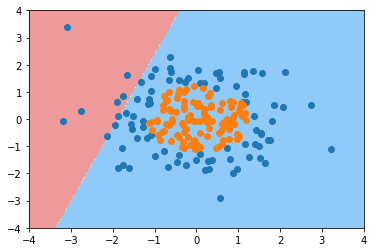

In [11]:
plot_decision_boundary(log_reg,axis=[-4,4,-4,4])
plt.scatter(X[y==0,0], X[y==0,1])
plt.scatter(X[y==1,0], X[y==1,1])
plt.show()

In [17]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
def PolynormalLogisticRegress(degree):
    return Pipeline([
        ('poly', PolynomialFeatures(degree=degree)),
        ('std_scaler', StandardScaler()),
        ('log_reg', LogisticRegression())
    ])

In [18]:
poly_log_reg = PolynormalLogisticRegress(degree=2)
poly_log_reg.fit(X, y)

Pipeline(memory=None,
         steps=[('poly',
                 PolynomialFeatures(degree=2, include_bias=True,
                                    interaction_only=False, order='C')),
                ('std_scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('log_reg', LogisticRegression())],
         verbose=False)

In [19]:
poly_log_reg.score(X,y)

0.97

/Users/doublc.qluv/opt/anaconda3/envs/torch/lib/python3.7/site-packages/ipykernel_launcher.py:15: UserWarning: The following kwargs were not used by contour: 'linewidth'
  from ipykernel import kernelapp as app


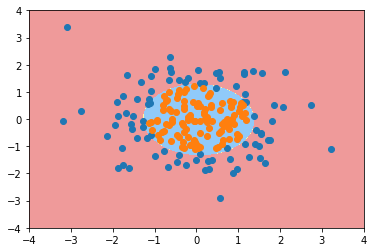

In [20]:
plot_decision_boundary(poly_log_reg,axis=[-4,4,-4,4])
plt.scatter(X[y==0,0], X[y==0,1])
plt.scatter(X[y==1,0], X[y==1,1])
plt.show()

In [27]:
poly_log_reg2 = PolynormalLogisticRegress(degree=10)
poly_log_reg2.fit(X, y)

Pipeline(memory=None,
         steps=[('poly',
                 PolynomialFeatures(degree=10, include_bias=True,
                                    interaction_only=False, order='C')),
                ('std_scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('log_reg', LogisticRegression())],
         verbose=False)

In [28]:
poly_log_reg2.score(X,y)

0.97

/Users/doublc.qluv/opt/anaconda3/envs/torch/lib/python3.7/site-packages/ipykernel_launcher.py:15: UserWarning: The following kwargs were not used by contour: 'linewidth'
  from ipykernel import kernelapp as app


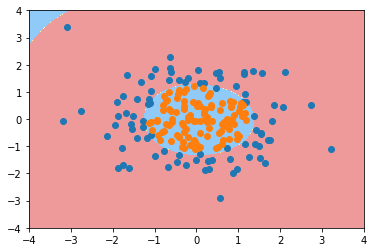

In [29]:
plot_decision_boundary(poly_log_reg2,axis=[-4,4,-4,4])
plt.scatter(X[y==0,0], X[y==0,1])
plt.scatter(X[y==1,0], X[y==1,1])
plt.show()

In [2]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(666)
X = np.random.normal(0,1,size=(200,2))
y = np.array(X[:,0]**2 + X[:,1] < 1.5, dtype = 'int')
for _ in range(20):
    y[np.random.randint(200)]=1

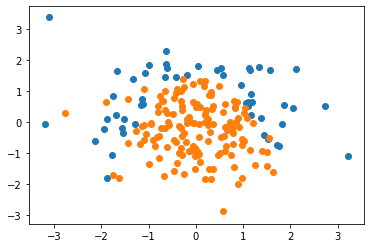

In [3]:
plt.scatter(X[y==0,0], X[y==0,1])
plt.scatter(X[y==1,0], X[y==1,1])
plt.show()

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=666)

## scikit-learn中的逻辑回归

In [6]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

/Users/doublc.qluv/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [7]:
log_reg.score(X_train,y_train)

0.7933333333333333

In [8]:
log_reg.score(X_test,y_test)

0.86

/Users/doublc.qluv/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: UserWarning: The following kwargs were not used by contour: 'linewidth'
  from ipykernel import kernelapp as app


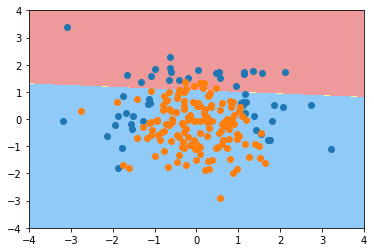

In [9]:
def plot_decision_boundary(model, axis):
    x0, x1 = np.meshgrid(
        np.linspace(axis[0], axis[1], int((axis[1]-axis[0])*100)).reshape(-1,1),
        np.linspace(axis[2], axis[3], int((axis[3]-axis[2])*100)).reshape(-1,1),
    )
    
    X_new = np.c_[x0.ravel(), x1.ravel()]

    y_predict = model.predict(X_new)
    zz = y_predict.reshape(x0.shape)

    from matplotlib.colors import ListedColormap
    custom_cmap = ListedColormap(['#EF9A9A','#FFF59D','#90CAF9'])
    
    plt.contourf(x0, x1, zz, linewidth=5, cmap=custom_cmap)

plot_decision_boundary(log_reg,axis=[-4,4,-4,4])
plt.scatter(X[y==0,0], X[y==0,1])
plt.scatter(X[y==1,0], X[y==1,1])
plt.show()

In [10]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
def PolynormalLogisticRegress(degree):
    return Pipeline([
        ('poly', PolynomialFeatures(degree=degree)),
        ('std_scaler', StandardScaler()),
        ('log_reg', LogisticRegression())
    ])

In [11]:
poly_log_reg = PolynormalLogisticRegress(degree=2)
poly_log_reg.fit(X_train,y_train)

/Users/doublc.qluv/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Pipeline(memory=None,
         steps=[('poly',
                 PolynomialFeatures(degree=2, include_bias=True,
                                    interaction_only=False, order='C')),
                ('std_scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('log_reg',
                 LogisticRegression(C=1.0, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=100,
                                    multi_class='warn', n_jobs=None,
                                    penalty='l2', random_state=None,
                                    solver='warn', tol=0.0001, verbose=0,
                                    warm_start=False))],
         verbose=False)

In [12]:
poly_log_reg.score(X_train,y_train)

0.9133333333333333

In [13]:
poly_log_reg.score(X_test,y_test)

0.94

/Users/doublc.qluv/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: UserWarning: The following kwargs were not used by contour: 'linewidth'
  from ipykernel import kernelapp as app


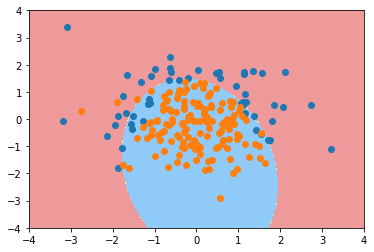

In [14]:
plot_decision_boundary(poly_log_reg,axis=[-4,4,-4,4])
plt.scatter(X[y==0,0], X[y==0,1])
plt.scatter(X[y==1,0], X[y==1,1])
plt.show()

/Users/doublc.qluv/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.94
0.92


/Users/doublc.qluv/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: UserWarning: The following kwargs were not used by contour: 'linewidth'
  from ipykernel import kernelapp as app


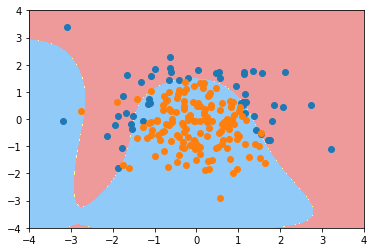

In [16]:
poly_log_reg = PolynormalLogisticRegress(degree=20)
poly_log_reg.fit(X_train,y_train)

print(poly_log_reg.score(X_train,y_train))
print(poly_log_reg.score(X_test,y_test))

plot_decision_boundary(poly_log_reg,axis=[-4,4,-4,4])
plt.scatter(X[y==0,0], X[y==0,1])
plt.scatter(X[y==1,0], X[y==1,1])
plt.show()

### C参数 
#### L2正则项

In [17]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
def PolynormalLogisticRegress(degree,C):
    return Pipeline([
        ('poly', PolynomialFeatures(degree=degree)),
        ('std_scaler', StandardScaler()),
        ('log_reg', LogisticRegression(C=C))
    ])

In [18]:
poly_log_regC = PolynormalLogisticRegress(degree=20,C=0.1)
poly_log_regC.fit(X_train,y_train)

/Users/doublc.qluv/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Pipeline(memory=None,
         steps=[('poly',
                 PolynomialFeatures(degree=20, include_bias=True,
                                    interaction_only=False, order='C')),
                ('std_scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('log_reg',
                 LogisticRegression(C=0.1, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=100,
                                    multi_class='warn', n_jobs=None,
                                    penalty='l2', random_state=None,
                                    solver='warn', tol=0.0001, verbose=0,
                                    warm_start=False))],
         verbose=False)

0.8533333333333334
0.92


/Users/doublc.qluv/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: UserWarning: The following kwargs were not used by contour: 'linewidth'
  from ipykernel import kernelapp as app


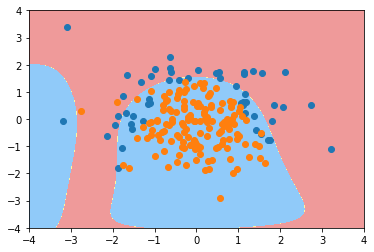

In [26]:
print(poly_log_regC.score(X_train,y_train))
print(poly_log_regC.score(X_test,y_test))

plot_decision_boundary(poly_log_regC,axis=[-4,4,-4,4])
plt.scatter(X[y==0,0], X[y==0,1])
plt.scatter(X[y==1,0], X[y==1,1])
plt.show()

#### L1正则

In [21]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
def PolynormalLogisticRegress(degree, C, penalty='l2'):
    return Pipeline([
        ('poly', PolynomialFeatures(degree=degree)),
        ('std_scaler', StandardScaler()),
        ('log_reg', LogisticRegression(C=C,penalty=penalty))
    ])


In [23]:
poly_log_regCl1 = PolynormalLogisticRegress(degree=20,C=0.1,penalty='l1')
poly_log_regCl1.fit(X_train,y_train)

/Users/doublc.qluv/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Pipeline(memory=None,
         steps=[('poly',
                 PolynomialFeatures(degree=20, include_bias=True,
                                    interaction_only=False, order='C')),
                ('std_scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('log_reg',
                 LogisticRegression(C=0.1, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=100,
                                    multi_class='warn', n_jobs=None,
                                    penalty='l1', random_state=None,
                                    solver='warn', tol=0.0001, verbose=0,
                                    warm_start=False))],
         verbose=False)

0.8266666666666667
0.9


/Users/doublc.qluv/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: UserWarning: The following kwargs were not used by contour: 'linewidth'
  from ipykernel import kernelapp as app


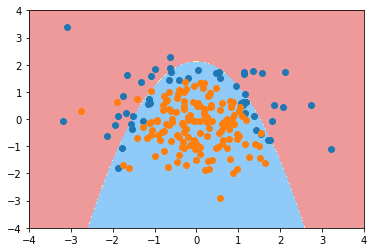

In [27]:
print(poly_log_regCl1.score(X_train,y_train))
print(poly_log_regCl1.score(X_test,y_test))

plot_decision_boundary(poly_log_regCl1,axis=[-4,4,-4,4])
plt.scatter(X[y==0,0], X[y==0,1])
plt.scatter(X[y==1,0], X[y==1,1])
plt.show()

# 08 OvR与OvO

## OvR(One vs Rest)

In [28]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

iris = datasets.load_iris()
X = iris.data[:,:2]
y = iris.target

In [29]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state =666)

In [30]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

/Users/doublc.qluv/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/doublc.qluv/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [31]:
log_reg.score(X_test, y_test)

0.6578947368421053

In [32]:
def plot_decision_boundary(model, axis):
    x0, x1 = np.meshgrid(
        np.linspace(axis[0], axis[1], int((axis[1]-axis[0])*100)).reshape(-1,1),
        np.linspace(axis[2], axis[3], int((axis[3]-axis[2])*100)).reshape(-1,1),
    )
    
    X_new = np.c_[x0.ravel(), x1.ravel()]

    y_predict = model.predict(X_new)
    zz = y_predict.reshape(x0.shape)

    from matplotlib.colors import ListedColormap
    custom_cmap = ListedColormap(['#EF9A9A','#FFF59D','#90CAF9'])
    
    plt.contourf(x0, x1, zz, linewidth=5, cmap=custom_cmap)

/Users/doublc.qluv/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: UserWarning: The following kwargs were not used by contour: 'linewidth'
  from ipykernel import kernelapp as app


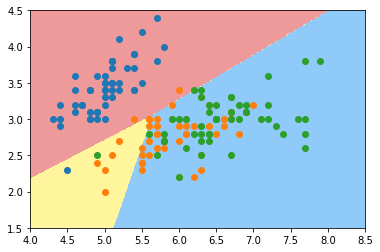

In [33]:
plot_decision_boundary(log_reg,axis=[4,8.5,1.5,4.5])
plt.scatter(X[y==0,0], X[y==0,1])
plt.scatter(X[y==1,0], X[y==1,1])
plt.scatter(X[y==2,0], X[y==2,1])
plt.show()

## OvO(One vs One)

In [34]:
log_reg2 = LogisticRegression(multi_class="multinomial",solver='newton-cg')

In [35]:
log_reg2.fit(X_train,y_train)
log_reg2.score(X_test,y_test)

0.7894736842105263

/Users/doublc.qluv/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: UserWarning: The following kwargs were not used by contour: 'linewidth'
  from ipykernel import kernelapp as app


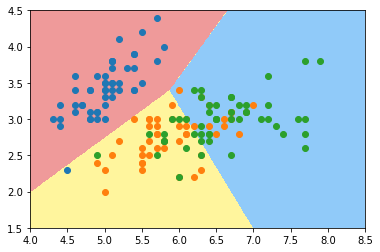

In [36]:
plot_decision_boundary(log_reg2,axis=[4,8.5,1.5,4.5])
plt.scatter(X[y==0,0], X[y==0,1])
plt.scatter(X[y==1,0], X[y==1,1])
plt.scatter(X[y==2,0], X[y==2,1])
plt.show()

### 使用所有的数据

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

iris = datasets.load_iris()
X = iris.data
y = iris.target

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state =666)

In [5]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(X_train,y_train)
log_reg.score(X_test,y_test)

/Users/doublc.qluv/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/doublc.qluv/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


0.9473684210526315

In [6]:
log_reg2 = LogisticRegression(multi_class="multinomial",solver='newton-cg')
log_reg2.fit(X_train,y_train)
log_reg2.score(X_test,y_test)

1.0

## scikit-learn中 OvO 和OvR的封装

In [11]:
from sklearn.multiclass import OneVsOneClassifier
ovr = OneVsOneClassifier(log_reg)
ovr.fit(X_train,y_train)
ovr.score(X_test,y_test)

1.0

In [12]:
from sklearn.multiclass import OneVsRestClassifier
ovr = OneVsRestClassifier(log_reg)
ovr.fit(X_train,y_train)
ovr.score(X_test,y_test)

0.9473684210526315

In [10]:
import warnings
warnings.filterwarnings('ignore')